In [1]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.2.3"
# HOST = "192.168.179.2"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [2]:
import pandas as pd

FILE_ID = "20190910083231" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [3]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値(deg),ジャイロ推定角度(rad),ジャイロ推定角速度(rad/sec),モーター角度誤差(rad),モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターデューティー比左,モーターデューティー比右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーター印加電圧比左,モーター印加電圧比右
0,0,0.020701,0.000000,0.020605,34,-1.0,0.009483,0.592714,-0.017453,-0.872665,-0.000279,2.940627,2.240627,8242466,0.0,0.0,2.940627,2.240627
1,1,0.035338,0.014637,0.010743,38,-5.5,0.020084,0.662515,-0.086510,-3.452820,-0.001663,-33.066771,-34.116771,8177733,0.0,0.0,-33.066771,-34.116771
2,2,0.049295,0.013957,0.010558,11,2.5,0.023144,0.191262,0.063717,7.511329,-0.000644,100.000000,100.000000,8036066,0.0,0.0,143.763181,142.713181
3,3,0.063240,0.013945,0.011394,34,-6.0,0.032627,0.592684,-0.081576,-7.264640,-0.001949,-92.577777,-93.277777,7604400,0.0,0.0,-92.577777,-93.277777
4,4,0.076683,0.013443,0.010658,36,3.5,0.042668,0.627578,0.093713,8.764461,-0.000450,100.000000,100.000000,7658800,0.0,0.0,190.450380,189.400380
5,5,0.090916,0.014233,0.011494,18,-4.5,0.047683,0.313405,-0.035872,-6.479255,-0.001024,-77.308566,-78.358566,7642400,0.0,0.0,-77.308566,-78.358566
6,6,0.104357,0.013441,0.010587,38,5.0,0.058282,0.662465,0.134949,8.541038,0.001135,100.000000,100.000000,7785733,0.0,0.0,199.738163,199.038163
7,7,0.117914,0.013557,0.010740,-9,-3.0,0.055756,-0.157854,0.005922,-6.451345,0.001230,-82.413925,-83.113925,7672066,0.0,0.0,-82.413925,-83.113925
8,8,0.132032,0.014118,0.011247,28,6.5,0.063563,0.487921,0.169203,8.164031,0.003937,100.000000,100.000000,7766066,0.0,0.0,194.618531,193.568531
9,9,0.145531,0.013499,0.010402,3,-1.5,0.064388,0.051579,0.037383,-6.590980,0.004536,-75.288529,-76.338529,7666000,0.0,0.0,-75.288529,-76.338529


In [4]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    xticks = np.arange(start, time_max, 0.1)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

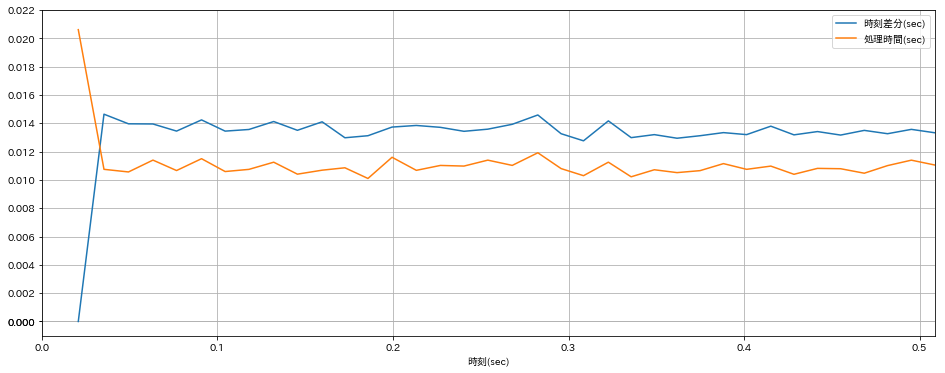

In [5]:
# =======================================================
# 処理時間と時刻差分のグラフの出力

columns_deg = [
    '時刻差分(sec)',
    '処理時間(sec)',
]
show_plot(df, columns_deg, 0.002, figsize=(16,6))

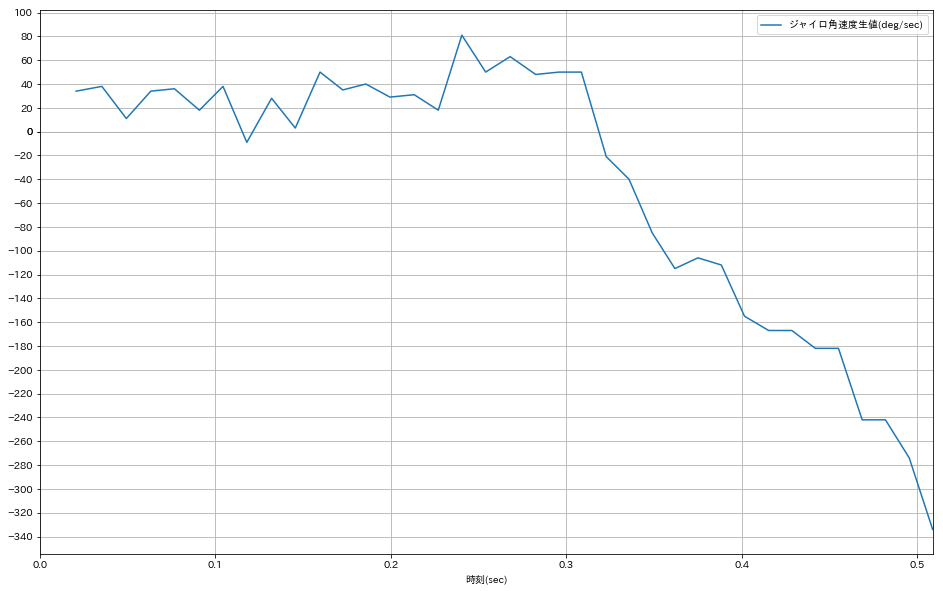

In [6]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

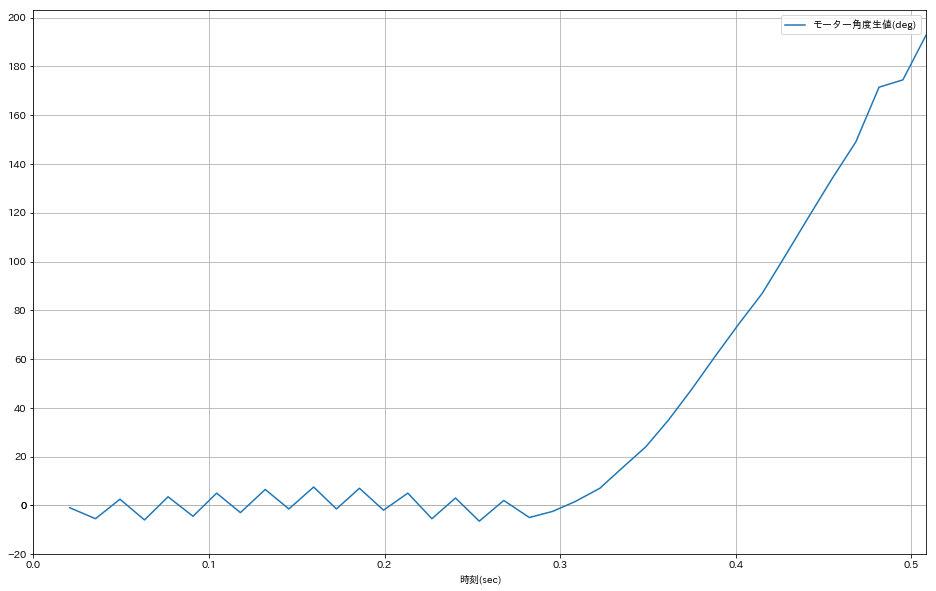

In [7]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'モーター角度生値(deg)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

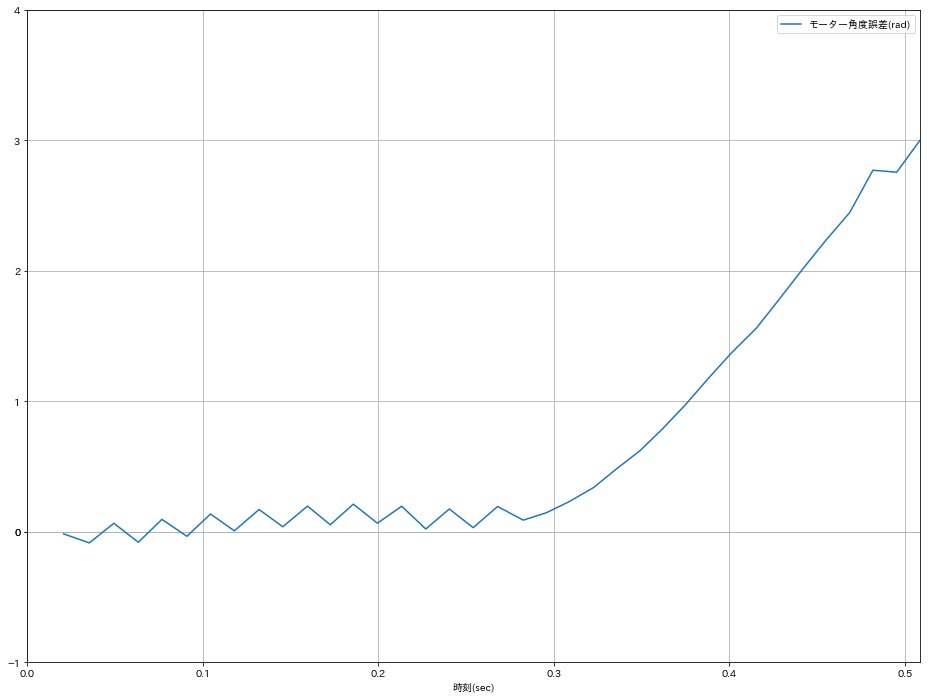

In [8]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

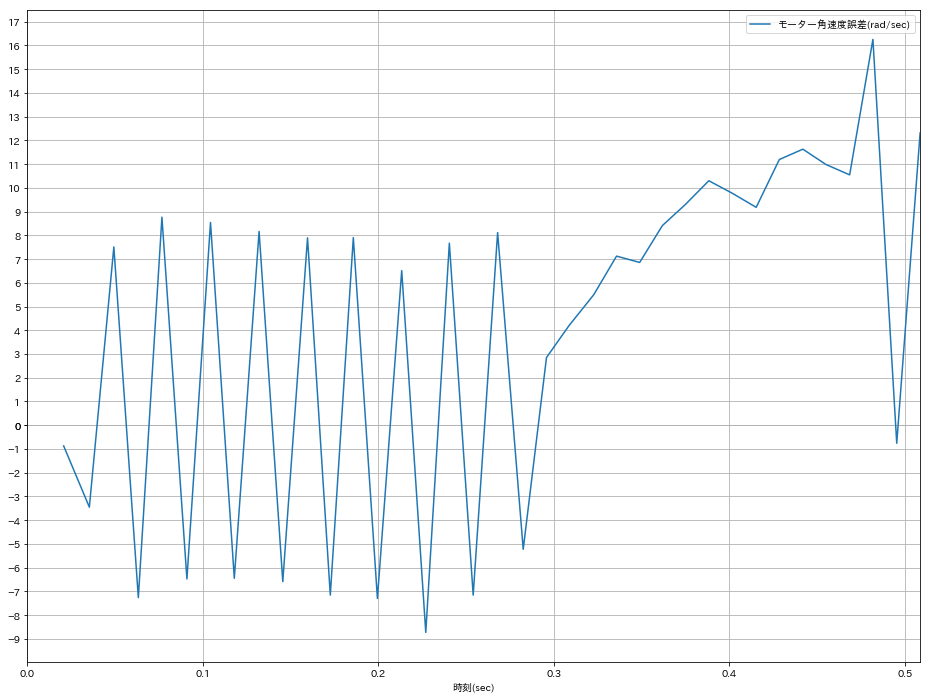

In [9]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角速度誤差(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

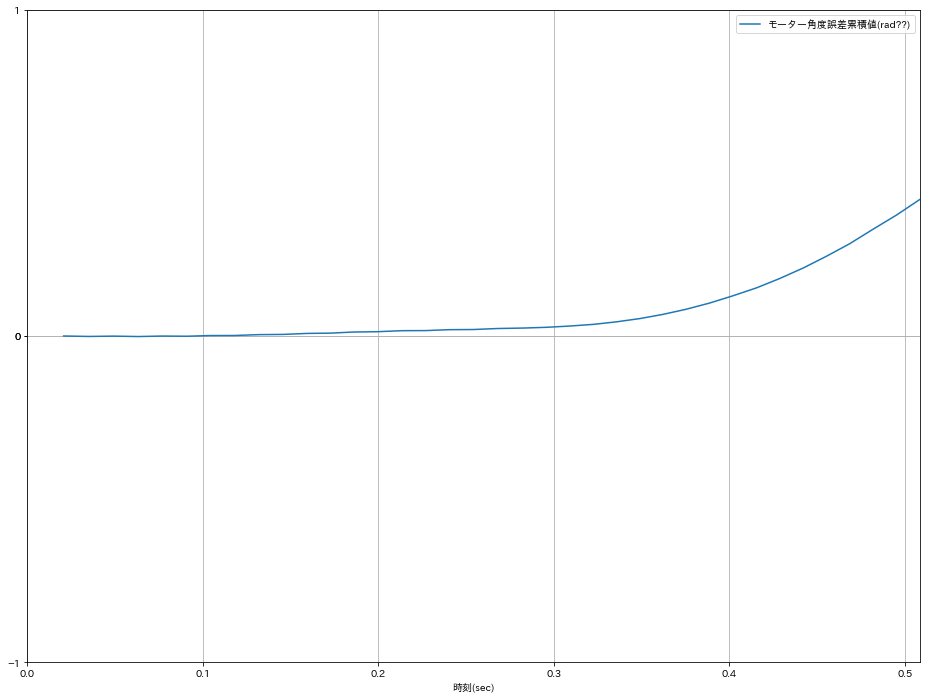

In [10]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

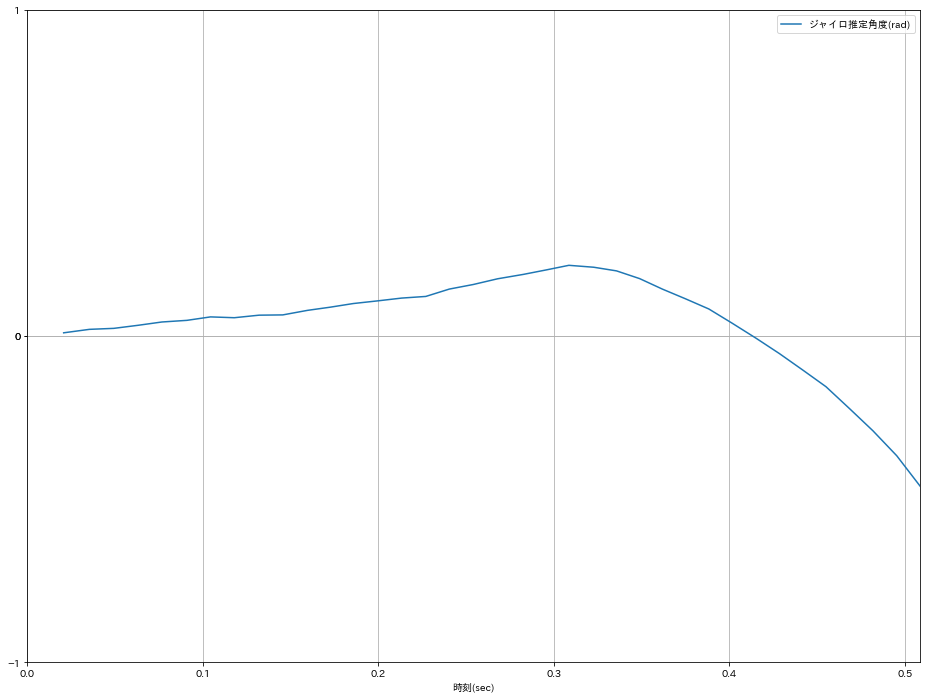

In [11]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

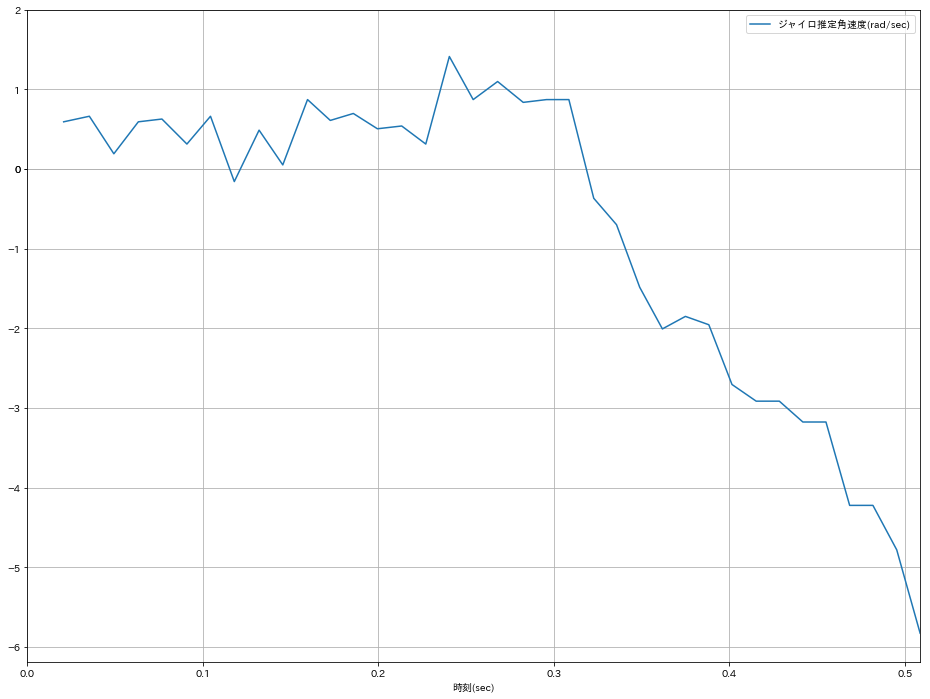

In [12]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角速度(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

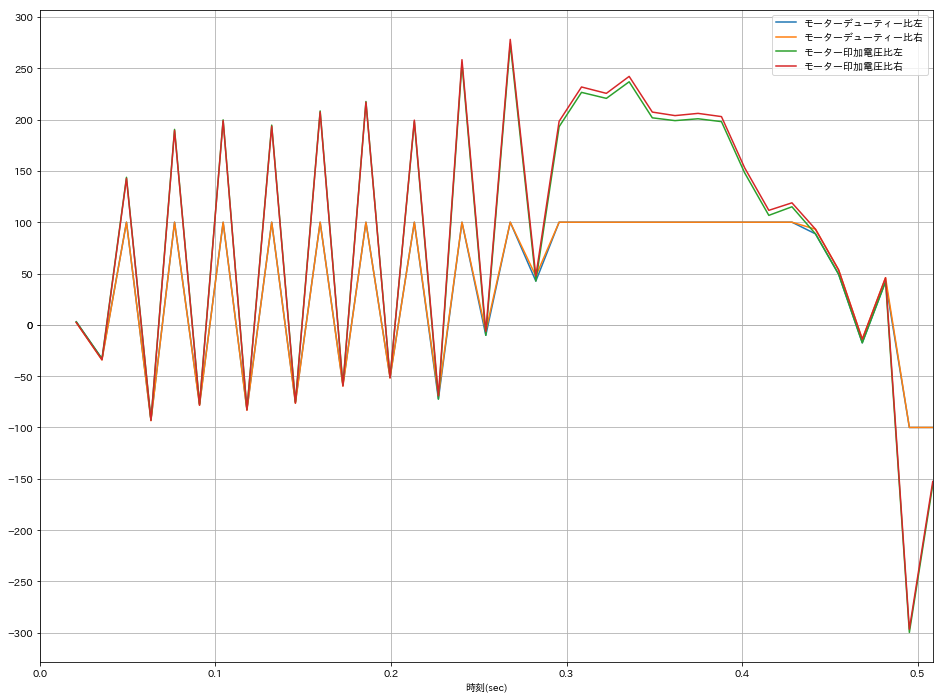

In [13]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターデューティー比左',
    'モーターデューティー比右',
    'モーター印加電圧比左',
    'モーター印加電圧比右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [14]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/Users/yoshinori/.matplotlib'

In [ ]:
# =======================================================
# モーター電圧生値のグラフ出力

columns_vol = [
    'モーター電圧生値'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)